In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")    

df=pd.read_csv('../data/uec_data_2023_2025_full.csv')

In [47]:
df['weekday']= pd.to_datetime(df['Date'], dayfirst=True).dt.day_of_week

In [48]:
hosp_sums=df.groupby('Hospital')['Total'].sum()
hospitals_over_1 = hosp_sums[hosp_sums > 1].index.tolist()

## Total Trolly Densities

<Axes: title={'center': 'Distribution of daily occupied trollies per hospital'}, ylabel='Density'>

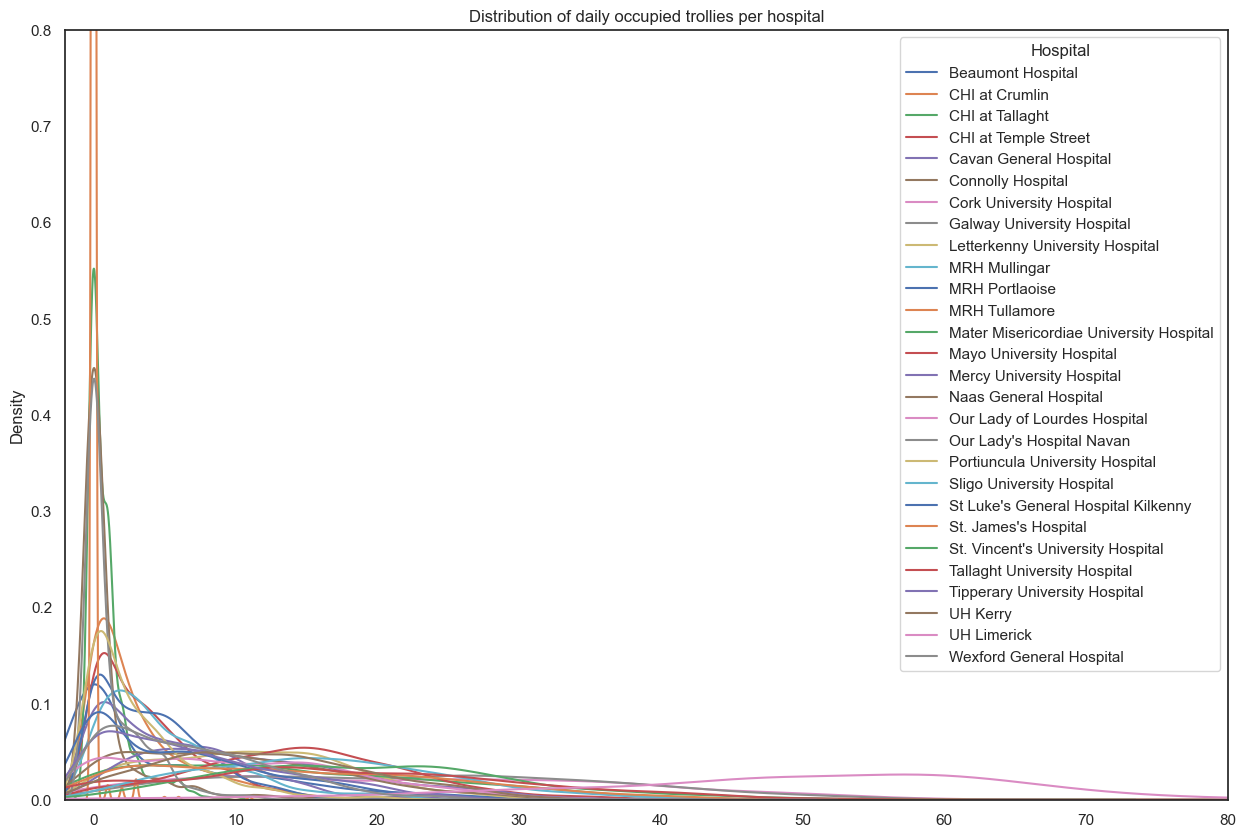

In [49]:
df_filt=df[(~df['Hospital'].str.contains('Total')) & (df['Hospital'].isin(hospitals_over_1))]
df_filt.pivot(columns='Hospital', values='Total').plot(kind='kde',\
                                                       figsize=(15,10),\
                                                        xlim=(-2,80),\
                                                       title="Distribution of daily occupied trollies per hospital",\
                                                        ylim=(0,.8))


<Axes: title={'center': 'Distribution of daily occupied trollies for UH Limerick'}, ylabel='Density'>

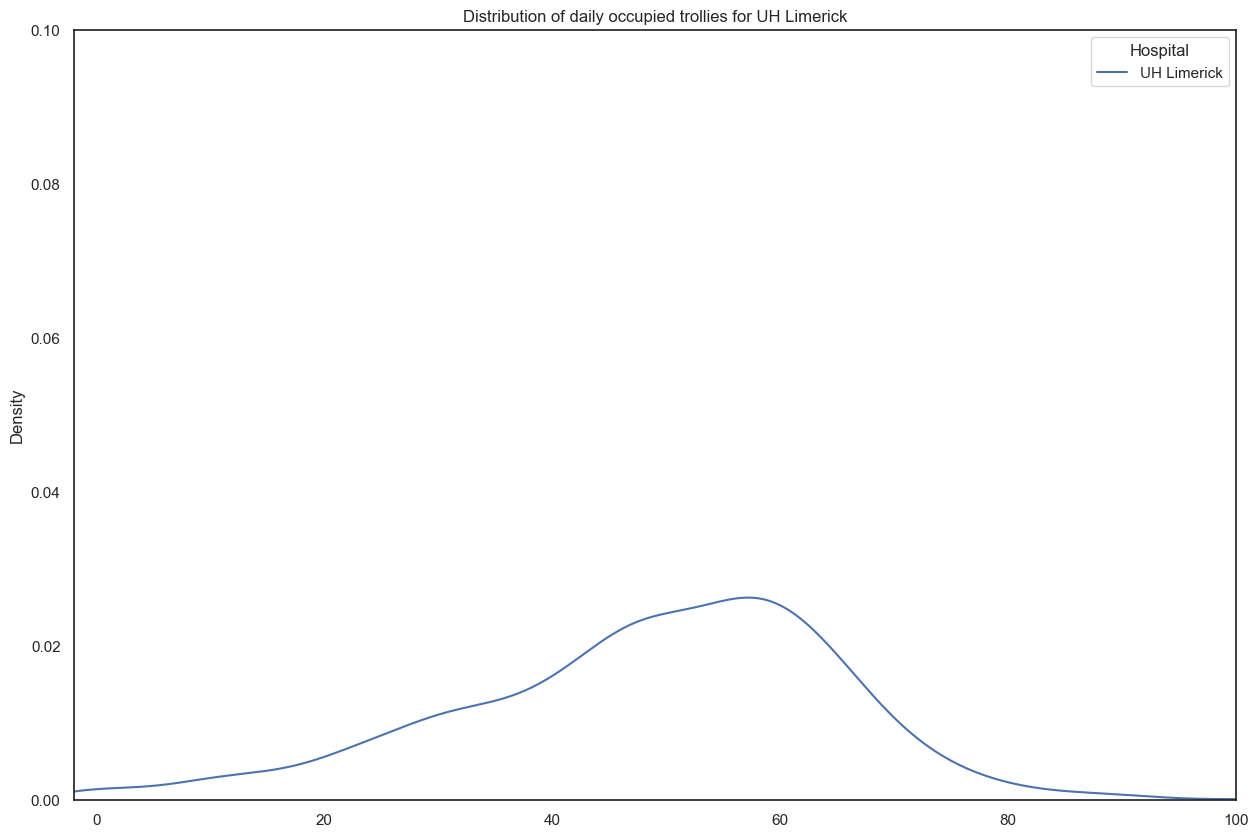

In [50]:
uh_limerick_df = df_filt[df_filt['Hospital'] == 'UH Limerick']
uh_limerick_df.pivot(columns='Hospital', values='Total').plot(  kind='kde',\
                                                                figsize=(15, 10),\
                                                                xlim=(-2, 100),\
                                                                title="Distribution of daily occupied trollies for UH Limerick",\
                                                                ylim=(0, .1))

## Plot Encatchment Areas

In [51]:
pop_df=pd.read_csv("../data/encatchment_areas.csv")

<Axes: title={'center': 'Population of HSE Health Regions'}, ylabel='Number of persons'>

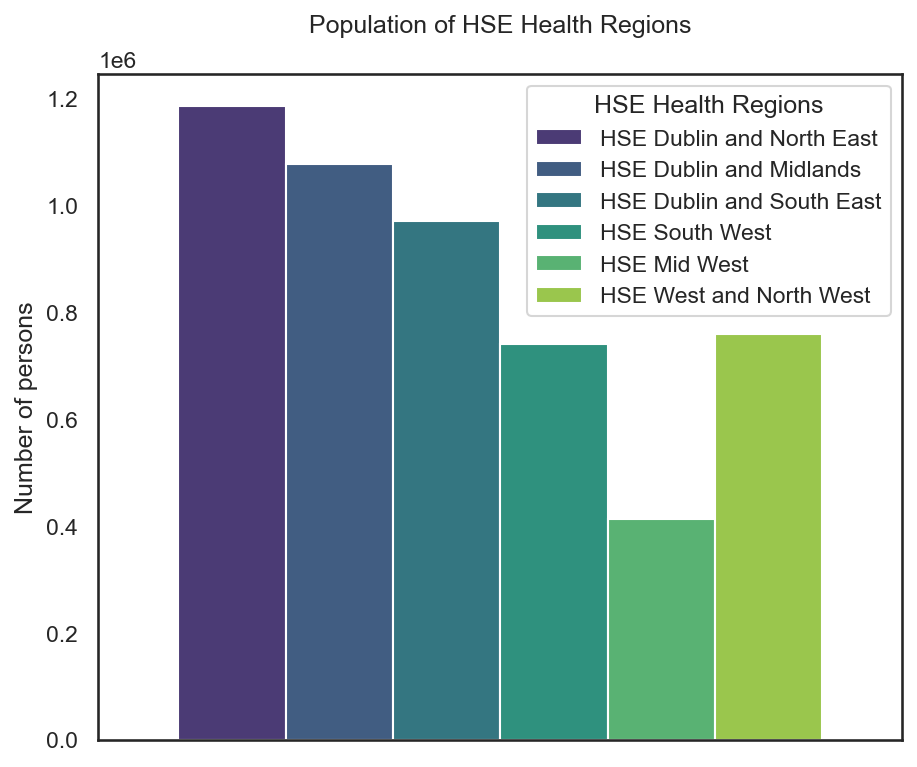

In [52]:
plt.figure(figsize = (6,5), dpi=150, layout='constrained')
ax = plt.gca()
ax.set_title("Population of HSE Health Regions", pad=20)
sns.barplot(data=pop_df, hue='HSE Health Regions', y='Number of persons', palette='viridis')

# Weekly Scaled Distributions

In [53]:
df=pd.read_csv('../data/long_weekly_scaledPer10k.csv')

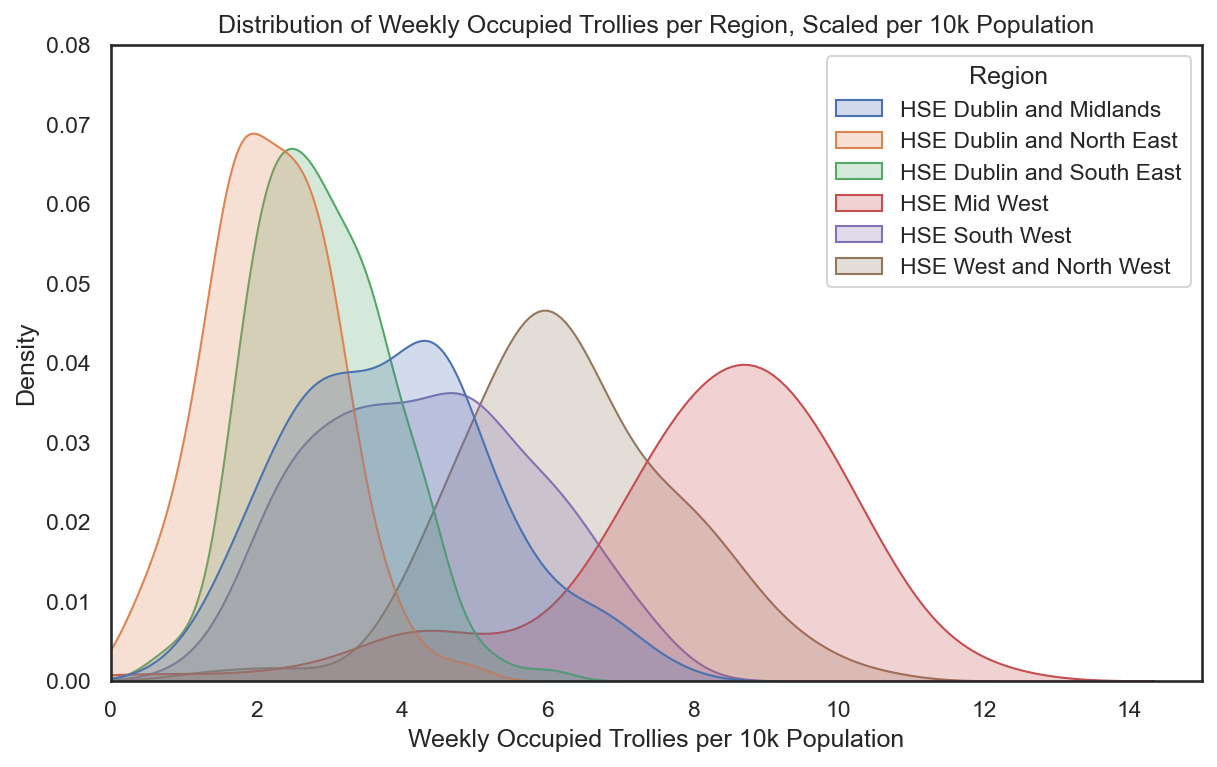

In [54]:

plt.figure(figsize=(8,5), dpi=150, layout='constrained')
ax = plt.gca()
sns.kdeplot(data=df.pivot(columns='Region', values='Value'), ax=ax, fill=True)
ax.set_xlabel("Weekly Occupied Trollies per 10k Population")
plt.xlim(0, 15)
plt.ylim(0, .08)
plt.title("Distribution of Weekly Occupied Trollies per Region, Scaled per 10k Population")
plt.show()